In [81]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
h_laser_low = 1650
h_laser_med = 1650
h_laser_high = 1650

In [83]:
date = "20160909-141139-078"
fname = 'results/' + date + '.txt'

print date
data = np.loadtxt(fname)

20160909-141139-078


In [84]:
data.shape

(100, 3)

In [85]:
pix_dist = data[: , 0].ravel()
altitude = data[: , 1].ravel()
alt_err = data[: , 2].ravel()

In [86]:
# Throw away lowest 10% and highest 10%
offset = int(0.1 * data.shape[0])

In [87]:
print data.shape[0]
idx_arr = altitude.argsort(axis=0)[offset : -offset]
print idx_arr.shape[0]

100
80


In [88]:
pix_dist = pix_dist[idx_arr]
altitude = altitude[idx_arr]
alt_err = alt_err[idx_arr]

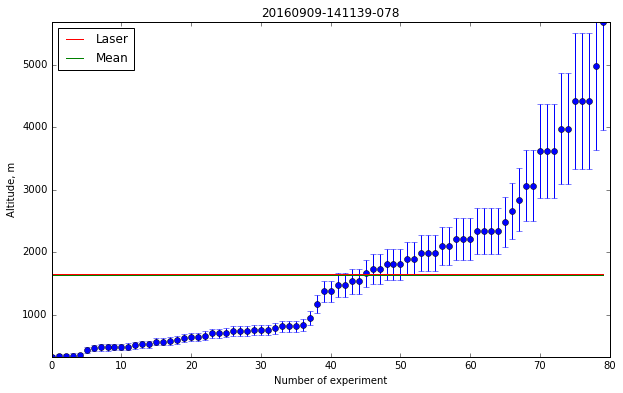

In [89]:
plt.figure(figsize=(10, 6))
plt.errorbar(range(altitude.shape[0]), altitude, yerr=alt_err, marker='o', linestyle='None')
plt.title(date)
plt.xlabel('Number of experiment')
plt.ylabel('Altitude, m')
plt.plot(range(altitude.shape[0]), h_laser_low * np.ones_like(altitude), 'r', label='Laser')
plt.plot(range(altitude.shape[0]), h_laser_med * np.ones_like(altitude), 'r')
plt.plot(range(altitude.shape[0]), h_laser_high * np.ones_like(altitude), 'r')
plt.plot(range(altitude.shape[0]), altitude.mean() * np.ones_like(altitude), 'g', label='Mean')
plt.legend(loc = 'upper left')
plt.ylim((altitude.min(), altitude.max()))
plt.savefig('results/' +'plot_' + date + '_' + str(altitude.shape[0]) + '.png')

In [90]:
print altitude

[  323.29643749   336.99543908   339.87574198   342.80570527   348.81984045
   432.23328056   457.0742737    473.3983549    473.3983549    479.10194954
   479.10194954   484.94465624   509.81361297   523.22976068   523.22976068
   568.07802588   568.07802588   576.31104075   593.5143554    621.3353408
   641.37841631   641.37841631   662.75769686   697.6396809    697.6396809
   710.09753235   736.39744095   736.39744095   736.39744095   750.29173229
   750.29173229   750.29173229   779.71493748   811.54003697   811.54003697
   811.54003697   828.44712107   946.7967098   1169.57240622  1371.22282109
  1371.22282109  1472.79488191  1472.79488191  1529.44083891  1529.44083891
  1656.89424215  1728.93312224  1728.93312224  1807.52099143  1807.52099143
  1807.52099143  1893.5934196   1893.5934196   1988.27309058  1988.27309058
  1988.27309058  2092.91904271  2092.91904271  2209.19232286  2209.19232286
  2209.19232286  2339.14481244  2339.14481244  2339.14481244  2339.14481244
  2485.3413632